In [1]:
import copy
import random

import numpy as np
import matplotlib.pyplot as plt
import mpltern

from matplotlib.lines import Line2D


def multiplicative_method(wC, A):
    v_glob = np.exp(np.sum(np.log(A) * wC, axis=1))
    w_glob = v_glob / v_glob.sum()
    return w_glob

def plot_sens_analysis_exec(wC, A, alter_names, w_glob, crits, filepath=None):
    def get_random_marker():
        MARKERS = [
            'o', 'v', '^', '<', '>',
            '1', '2', '3', '4', '8', 's', 'p',
            'P', '*', 'h', 'H', '+', 'x', 'X',
            'D', 'd'
        ]
        return MARKERS[random.randint(0, len(MARKERS) - 1)]
    
    fig, ax1 = plt.subplots()
    
    crits = copy.deepcopy(crits) + ["Глоб вага"] 

    ax1.set_ylim(bottom=0.0, top=1.0)
    ax1.set_ylabel('ваги альтернатив, %')
    ax1.bar(range(A.shape[1]), list(wC[0]), width=0.2, color="royalblue", alpha=0.5)

    ax2 = ax1.twinx()

    ax2.set_xticks([])
    ax2.set_ylabel('ваги критеріїв, %')
    ax2.set_ylim(bottom=0.0, top=1.0)

    for i_alter, alter_name in enumerate(alter_names):
        alter_weights = A[i_alter, :]
        ax2.plot(
            range(A.shape[1] + 1),
            list(alter_weights) + [w_glob[i_alter]],
            marker=get_random_marker(),
            markersize=10,
            label=alter_name,
        )

    ax2.tick_params(axis='y')
    ax2.set_xticks(ticks=range(A.shape[1] + 1), labels=crits)

    ax2.set_zorder(10)
    ax2.patch.set_alpha(0.5)
    fig.tight_layout()
    ax2.legend(loc="best")
    ax = plt.gca()
    ax.grid(True)
    plt.title("АЧ виконання")
    if filepath is not None:
        plt.savefig(filepath, dpi=300)
    plt.show()

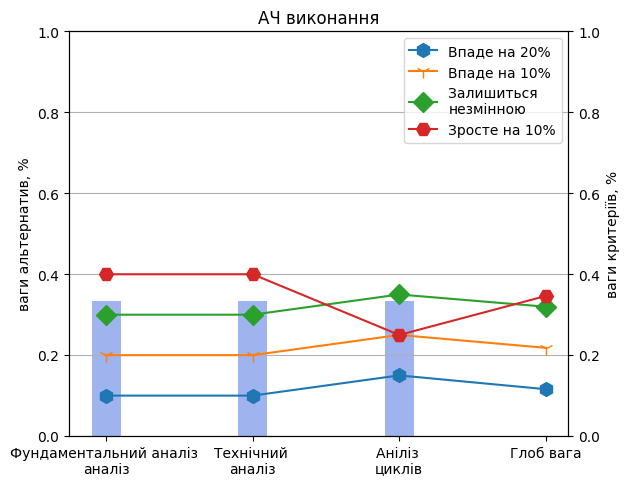

In [2]:
A = np.array([
    [0.1, 0.1, 0.15],
    [0.2, 0.2, 0.25],
    [0.3, 0.3, 0.35],
    [0.4, 0.4, 0.25],
])

wC = np.array([[1/3., 1/3., 1/3.]])

crits = [
    "Фундаментальний аналіз \nаналіз",
    "Технічний \nаналіз",
    "Аніліз \nциклів",
]

alter_names = [
    "Впаде на 20%",
    "Впаде на 10%",
    "Залишиться \nнезмінною",
    "Зросте на 10%",
]

filepath = None
w_glob = multiplicative_method(wC, A)
plot_sens_analysis_exec(wC, A, alter_names, w_glob, crits, filepath)

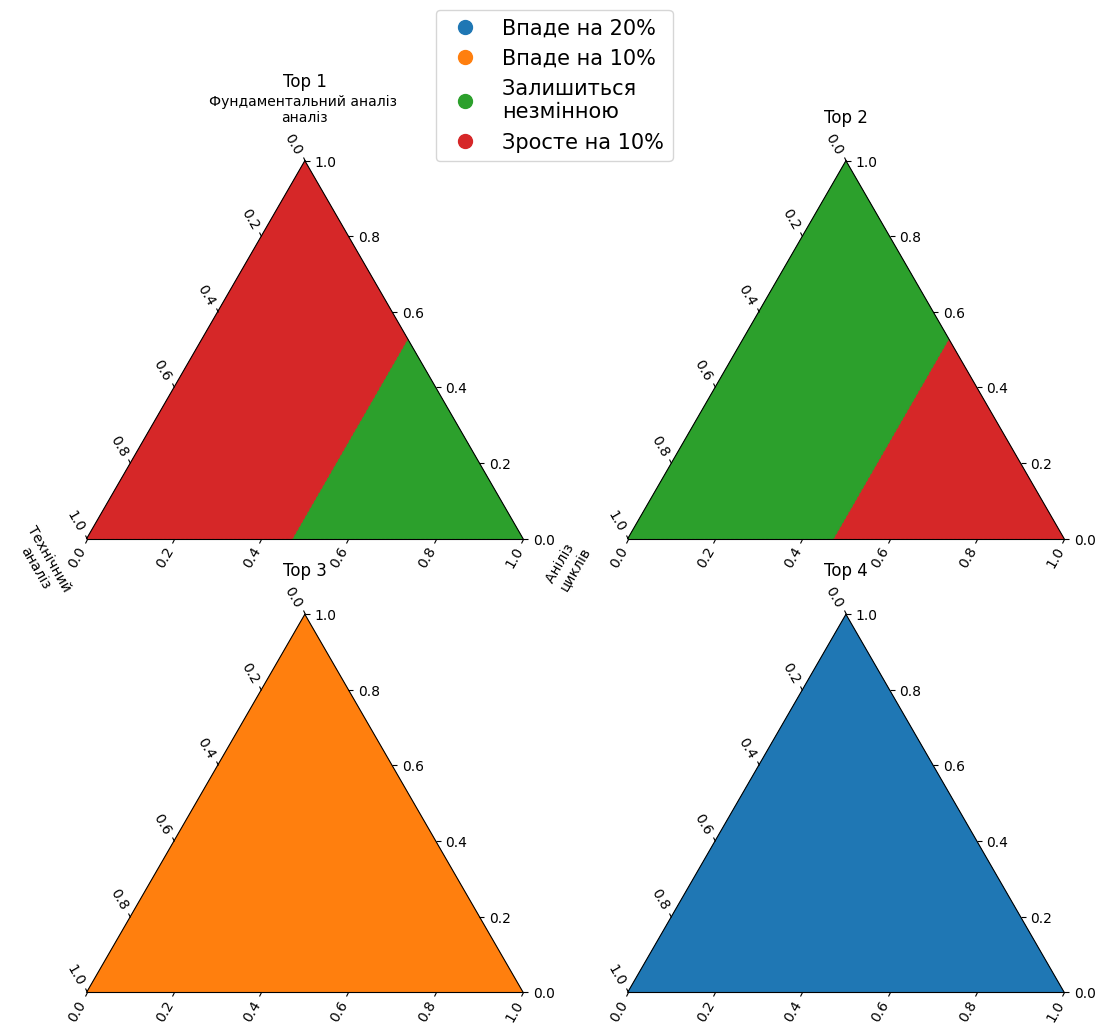

In [3]:
W0 = np.arange(0.0, 1.0, step=0.01)
W1 = np.arange(0.0, 1.0, step=0.01)
W0, W1 = np.meshgrid(W0, W1)
W0 = W0.flatten()
W1 = W1.flatten()
mask = W0 + W1 <= 1.0
W0 = W0[mask]
W1 = W1[mask]
W2 = 1.0 - W0 - W1
WC = np.vstack([W0, W1, W2])

COL = {0: "tab:blue", 1: "tab:orange", 2: "tab:green", 3:"tab:red"}

W_C0 = []
W_C1 = []
W_C2 = []
colors1 = []
colors2 = []
colors3 = []
colors4 = []

for w_C in WC.T:
    w_g = multiplicative_method(w_C[None, :], A)
    sorts = np.argsort(w_g)[::-1]
    top1 = sorts[0]
    top2 = sorts[1]
    top3 = sorts[2]
    top4 = sorts[3]
    col1 = COL[top1]
    col2 = COL[top2]
    col3 = COL[top3]
    col4 = COL[top4]
    W_C0.append(w_C[0])
    W_C1.append(w_C[1])
    W_C2.append(w_C[2])
    colors1.append(col1)
    colors2.append(col2)
    colors3.append(col3)
    colors4.append(col4)

fig = plt.figure(figsize=(12.8, 10.8))

ax = fig.add_subplot(2, 2, 1, projection='ternary')
ax.scatter(W_C0, W_C1, W_C2, color=colors1)
ax.set_title("Top 1")
ax.set_tlabel(crits[0])
ax.set_llabel(crits[1])
ax.set_rlabel(crits[2])


custom = [
    Line2D([], [], marker='.', markersize=20, color='tab:blue', linestyle='None'),
    Line2D([], [], marker='.', markersize=20, color='tab:orange', linestyle='None'),
    Line2D([], [], marker='.', markersize=20, color='tab:green', linestyle='None'),
    Line2D([], [], marker='.', markersize=20, color='tab:red', linestyle='None'),
]

plt.legend(custom, alter_names, loc=(0.8, 1.0), fontsize=15)

ax = fig.add_subplot(2, 2, 2, projection='ternary')
ax.scatter(W_C0, W_C1, W_C2, color=colors2)
ax.set_title("Top 2")


ax = fig.add_subplot(2, 2, 3, projection='ternary')
ax.scatter(W_C0, W_C1, W_C2, color=colors3)
ax.set_title("Top 3")

ax = fig.add_subplot(2, 2, 4, projection='ternary')
ax.scatter(W_C0, W_C1, W_C2, color=colors4)
ax.set_title("Top 4")

plt.show()